In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news = pd.read_csv("/content/drive/MyDrive/DL Project/OnlineNewsPopularity.csv")
news

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
news.keys()

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
desired_columns = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares' ]
new_news = news[desired_columns]

In [ ]:
# Remove leading and trailing spaces from column names
new_news.columns = new_news.columns.str.strip()

# Convert relevant columns in new_news to categorical data types
categorical_columns = [
    'is_weekend', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
    'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world'
]

# Apply the conversion if the columns are present in the data
for col in categorical_columns:
    if col in new_news.columns:
        new_news[col] = new_news[col].astype('category')

# Display the data types of new_news to confirm changes
new_news.dtypes


<ipython-input-5-030c07827245>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_news[col] = new_news[col].astype('category')


,0
timedelta,float64
n_tokens_title,float64
n_tokens_content,float64
n_unique_tokens,float64
n_non_stop_words,float64
n_non_stop_unique_tokens,float64
num_hrefs,float64
num_self_hrefs,float64
num_imgs,float64
num_videos,float64


In [ ]:
new_news.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
desired_columns = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens',' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares' ]
new_news = news[desired_columns]
new_news.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
threshold = 150000


fltr_new_news = new_news[new_news[' shares'] <= threshold]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictors = fltr_new_news.drop([' shares'], axis=1)
target = fltr_new_news[' shares']


threshold = 1400
target = (target > threshold).astype(int)


predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.3, random_state=1
)


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(predictors_train, target_train)


target_pred = dt_model.predict(predictors_test)


accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
report = classification_report(target_test, target_pred)

# Print evaluation results
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Decision Tree Accuracy: 0.57

Confusion Matrix:
[[3448 2651]
 [2507 3281]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      6099
           1       0.55      0.57      0.56      5788

    accuracy                           0.57     11887
   macro avg       0.57      0.57      0.57     11887
weighted avg       0.57      0.57      0.57     11887



In [ ]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

[Text(0.5, 0.9166666666666666, ' kw_avg_avg <= 2825.087\nentropy = 1.0\nsamples = 27734\nvalue = [13983.0, 13751.0]\nclass = No'),
 Text(0.25, 0.75, ' timedelta <= 606.5\nentropy = 0.968\nsamples = 13241\nvalue = [8002.0, 5239.0]\nclass = No'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, ' self_reference_avg_sharess <= 2099.833\nentropy = 0.937\nsamples = 10137\nvalue = [6556.0, 3581.0]\nclass = No'),
 Text(0.0625, 0.4166666666666667, ' is_weekend <= 0.5\nentropy = 0.859\nsamples = 5612\nvalue = [4026.0, 1586.0]\nclass = No'),
 Text(0.03125, 0.25, ' kw_max_avg <= 3539.269\nentropy = 0.829\nsamples = 4995\nvalue = [3690, 1305]\nclass = No'),
 Text(0.015625, 0.08333333333333333, 'entropy = 0.748\nsamples = 2249\nvalue = [1769, 480]\nclass = No'),
 Text(0.046875, 0.08333333333333333, 'entropy = 0.882\nsamples = 2746\nvalue = [1921, 825]\nclass = No'),
 Text(0.09375, 0.25, ' data_channel_is_tech <= 0.5\nentropy = 0.994\nsamples = 617\nvalue = [336.0, 281.0]

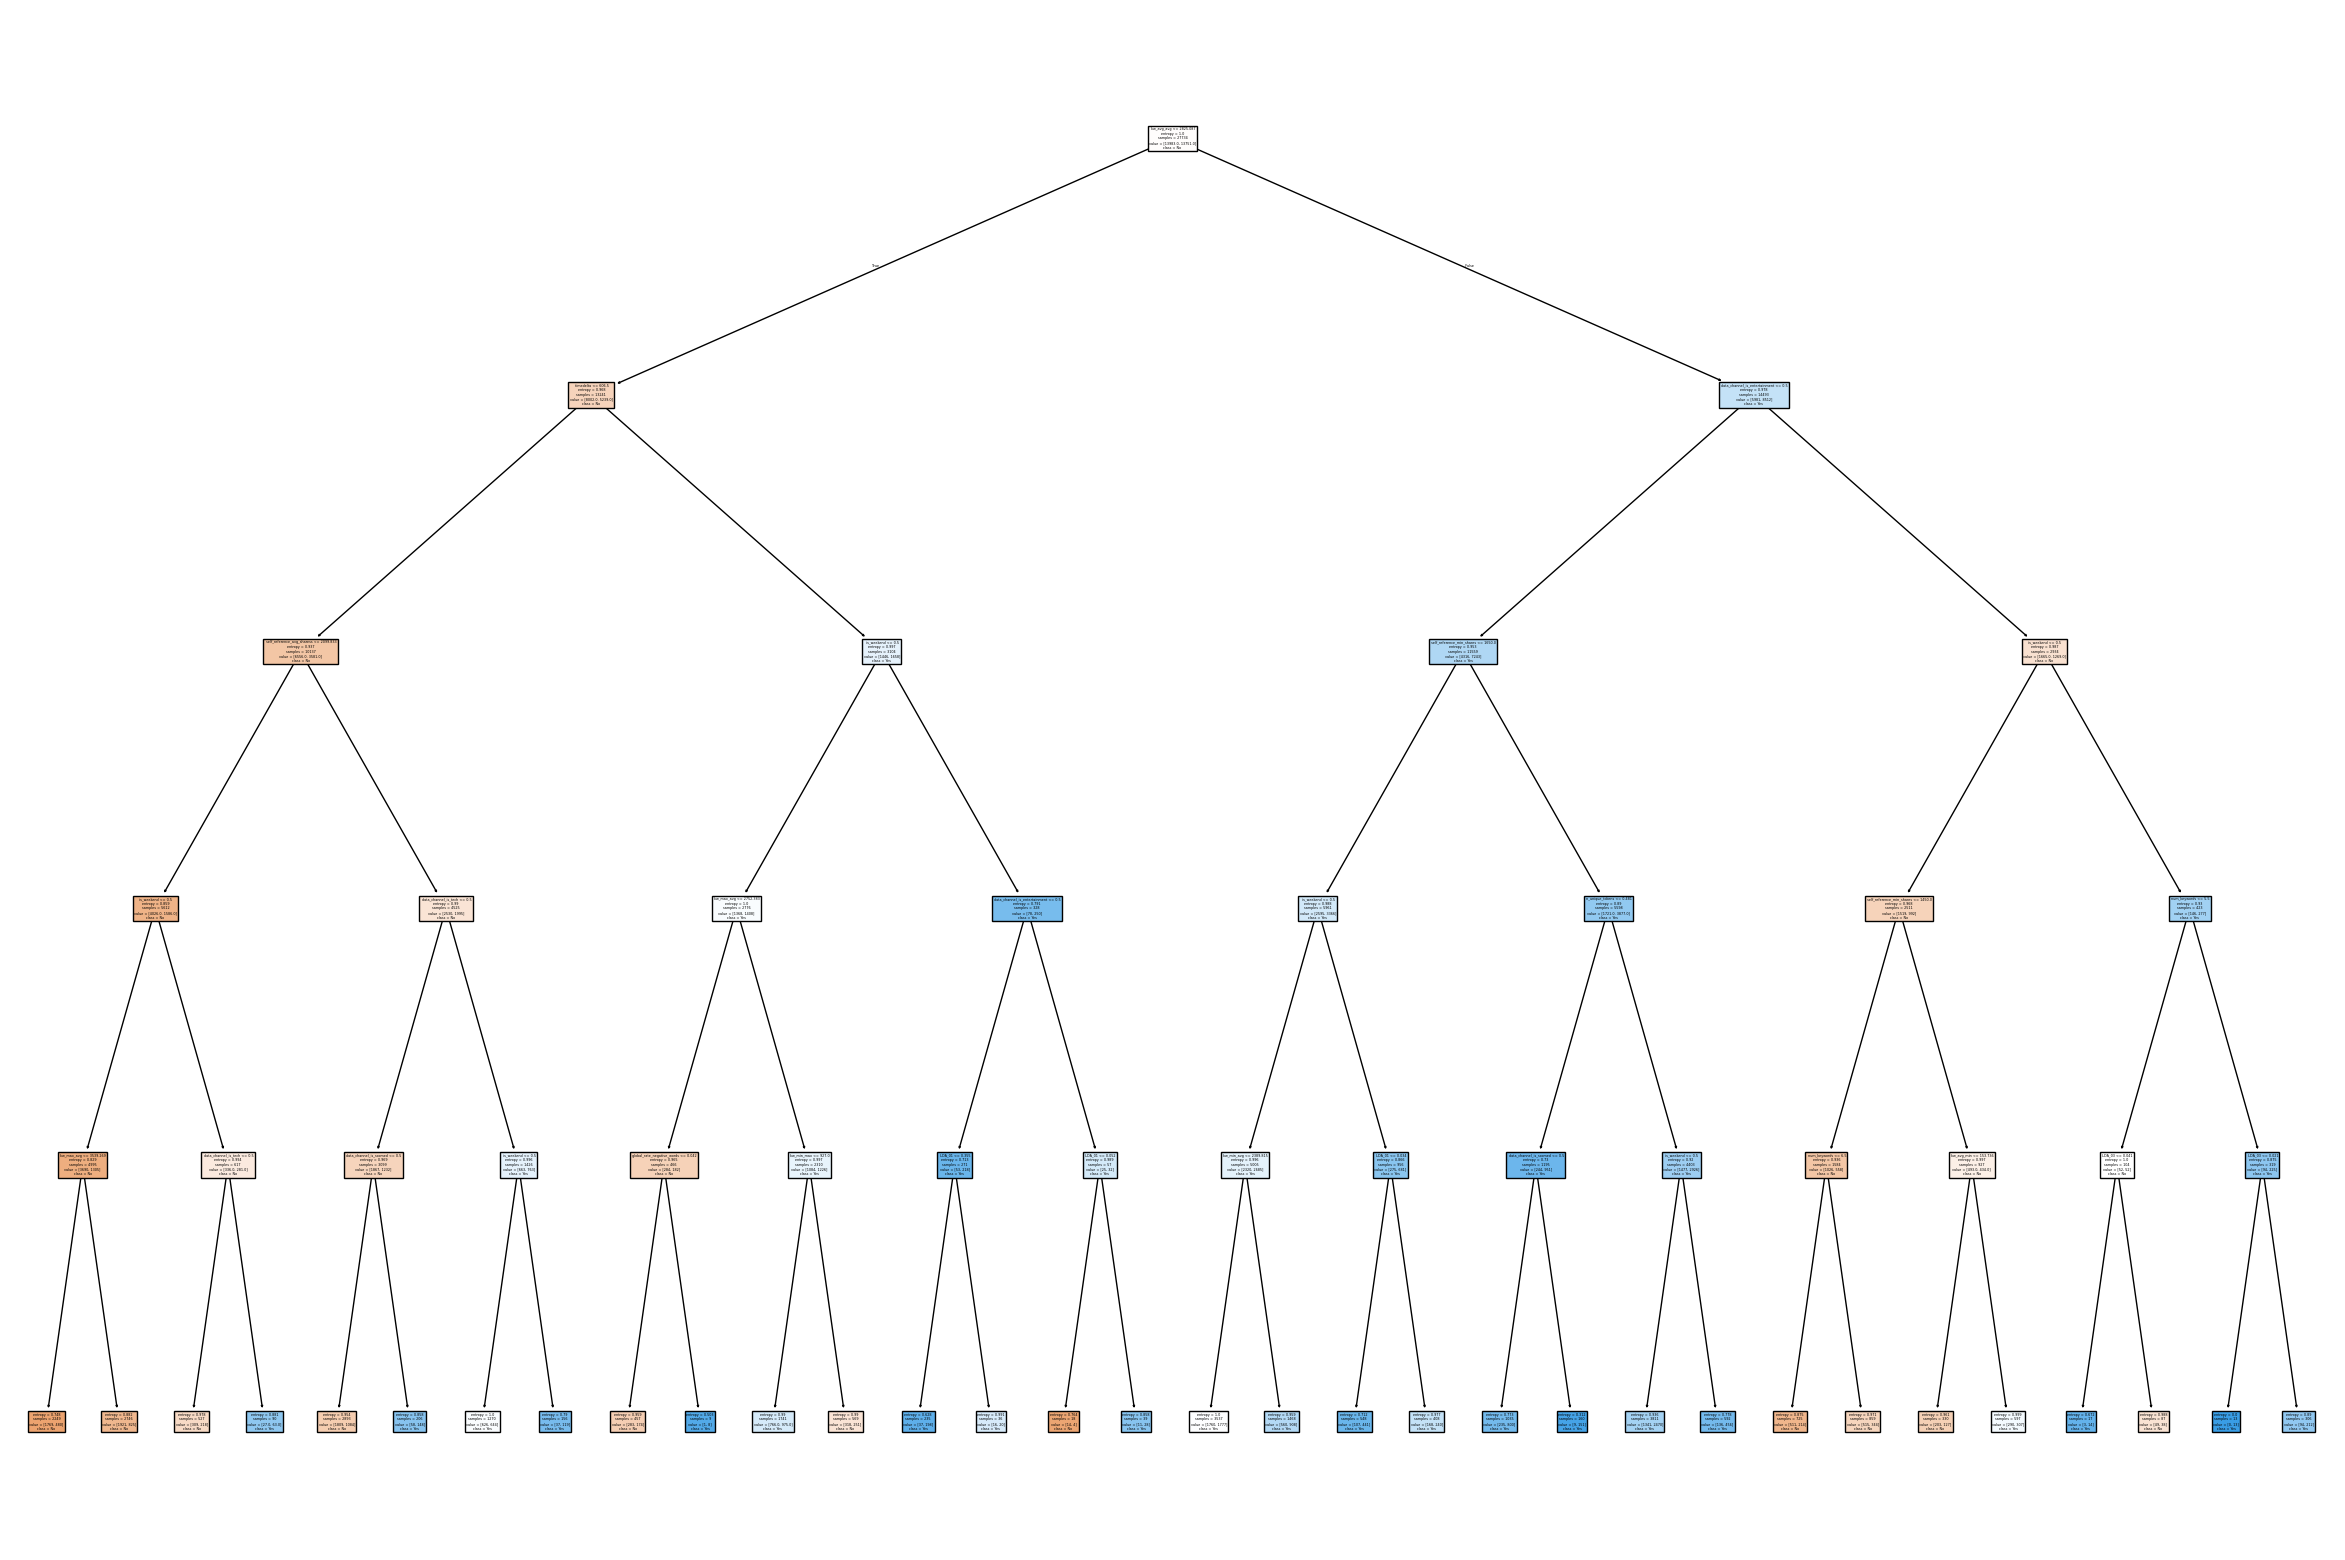

In [ ]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

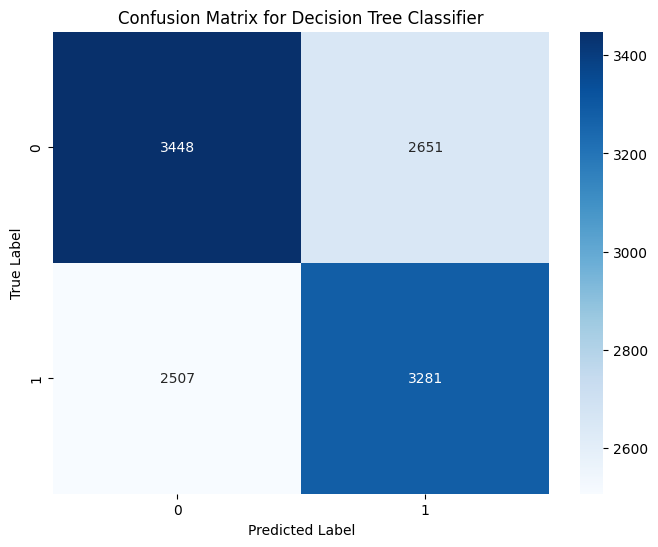

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(target_test, target_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Define predictors and target
X = fltr_new_news.drop([' shares'], axis=1)  # Drop the target column
y = fltr_new_news[' shares']  # Target column (binarized if needed)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (27734, 57)
Testing Data Shape: (11887, 57)


In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.05947673929502818
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         2
          93       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Support Vector Machine Model
from sklearn.svm import SVC

svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.05829898208126525
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         2
          93       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error


rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

if isinstance(y_train.iloc[0], int):
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
else:
    print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest MSE: 51992031.7751325


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)


svm_predictions = svm_model.predict(X_test_scaled)


svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.06
SVM Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         0
          52       0.00      0.00      0.00         0
          53       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         1
          59       0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Regression MSE: {mse:.2f}")


XGBoost Regression MSE: 44689069.02


Analysis starts from here, above is to test models

# Desecion Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Decision Tree Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      5927
           1       0.62      0.70      0.66      5960

    accuracy                           0.63     11887
   macro avg       0.63      0.63      0.63     11887
weighted avg       0.63      0.63      0.63     11887

Confusion Matrix:
[[3368 2559]
 [1811 4149]]


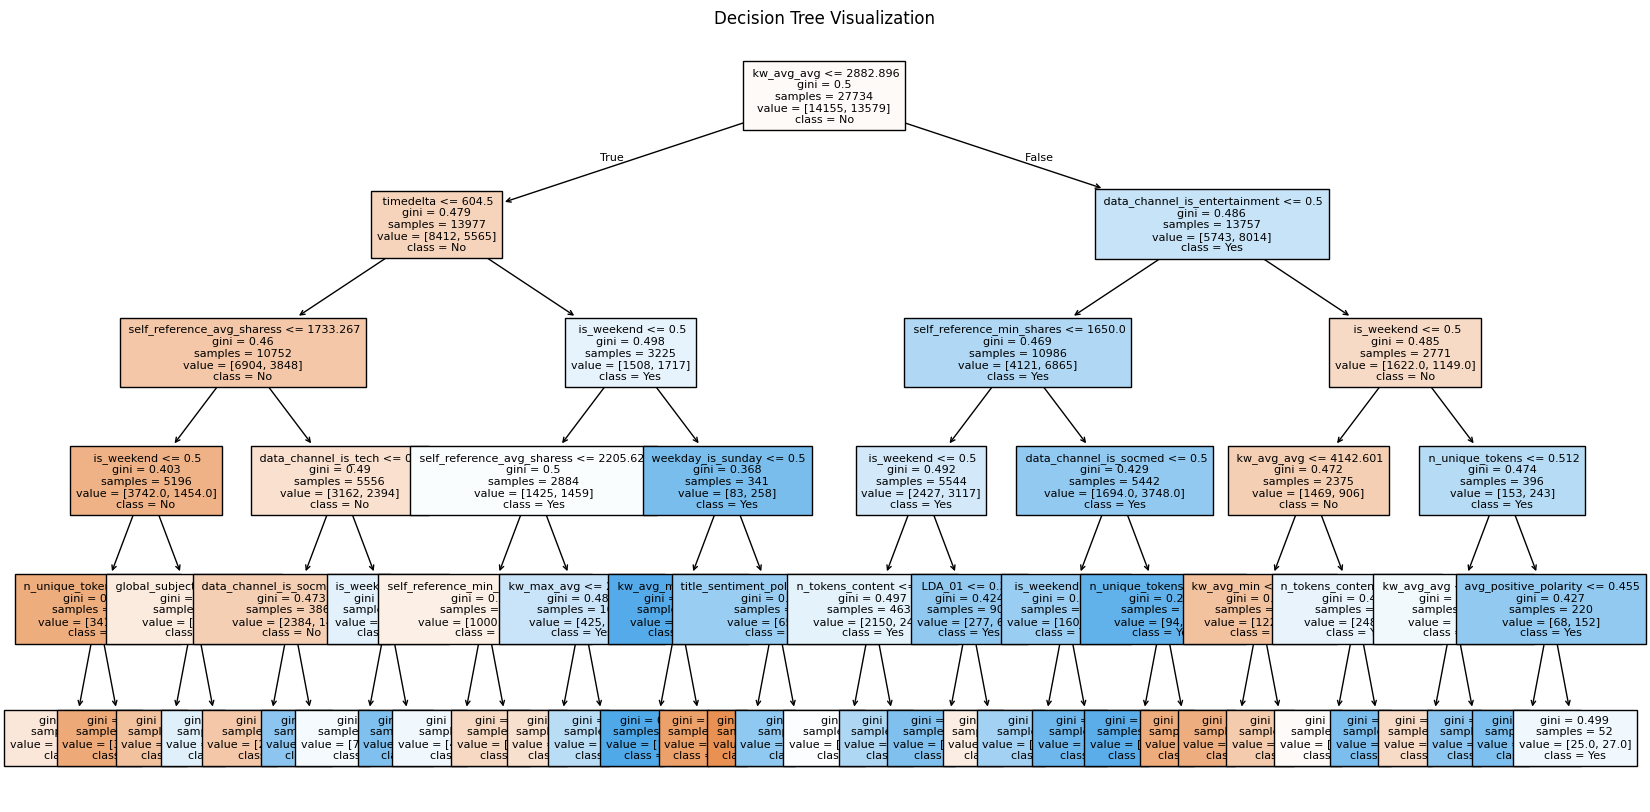

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=list(predictors_train.columns),
               class_names=['No','Yes'], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()


### Tuning descion tree

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
cv_results = pd.DataFrame(grid_search.cv_results_)

# top 10
print("\nTop 10 Results:")
print(cv_results[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(10))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validated Accuracy: 0.6286504057936926

Top 10 Results:
    mean_test_score  std_test_score  \
20         0.628650        0.006835   
18         0.628542        0.006304   
19         0.628290        0.005978   
23         0.628290        0.006897   
21         0.628074        0.006011   
22         0.627713        0.006271   
57         0.627388        0.005498   
54         0.627100        0.006110   
59         0.626992        0.006440   
58         0.626956        0.005530   

                                               params  
20  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  
18  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  
19  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  
23  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  
21  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  
2

### bestparameters after tuning

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:

feature_importances = dt_model.feature_importances_
sorted_importances = sorted(zip(predictors.columns, feature_importances), key=lambda x: x[1], reverse=True)

print("Feature Importances (Descending Order):")
for name, importance in sorted_importances:
    print(f"{name}: {importance:.2f}")



Feature Importances (Descending Order):
 kw_avg_avg: 0.32
 is_weekend: 0.12
 data_channel_is_entertainment: 0.12
 timedelta: 0.09
 self_reference_avg_sharess: 0.09
 self_reference_min_shares: 0.06
 data_channel_is_socmed: 0.05
 data_channel_is_tech: 0.04
 n_unique_tokens: 0.03
 n_tokens_content: 0.02
 LDA_01: 0.01
 kw_avg_min: 0.01
 global_subjectivity: 0.01
 kw_max_avg: 0.00
 weekday_is_sunday: 0.00
 title_sentiment_polarity: 0.00
 avg_positive_polarity: 0.00
 n_tokens_title: 0.00
 num_hrefs: 0.00
 num_self_hrefs: 0.00
 num_imgs: 0.00
 num_videos: 0.00
 average_token_length: 0.00
 num_keywords: 0.00
 data_channel_is_lifestyle: 0.00
 data_channel_is_bus: 0.00
 data_channel_is_world: 0.00
 kw_min_min: 0.00
 kw_max_min: 0.00
 kw_min_max: 0.00
 kw_max_max: 0.00
 kw_avg_max: 0.00
 kw_min_avg: 0.00
 self_reference_max_shares: 0.00
 weekday_is_monday: 0.00
 weekday_is_tuesday: 0.00
 weekday_is_wednesday: 0.00
 weekday_is_thursday: 0.00
 weekday_is_friday: 0.00
 weekday_is_saturday: 0.00
 LDA

In [ ]:

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=42
)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      5927
           1       0.64      0.58      0.61      5960

    accuracy                           0.63     11887
   macro avg       0.63      0.63      0.63     11887
weighted avg       0.63      0.63      0.63     11887



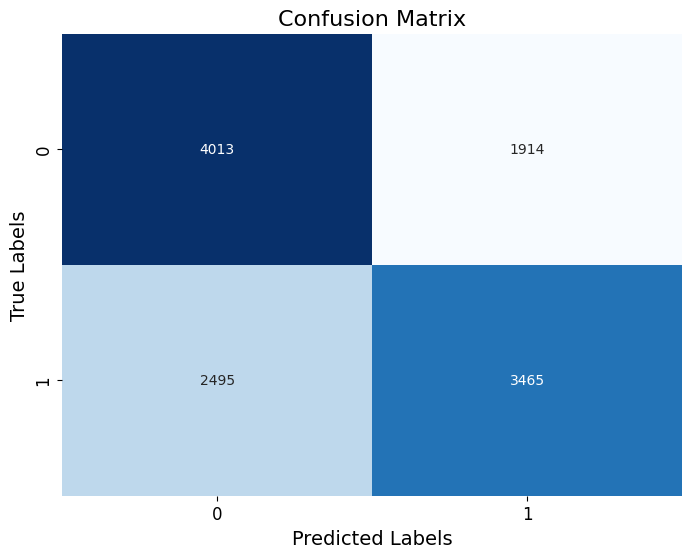

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<ipython-input-24-92617c8c60a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


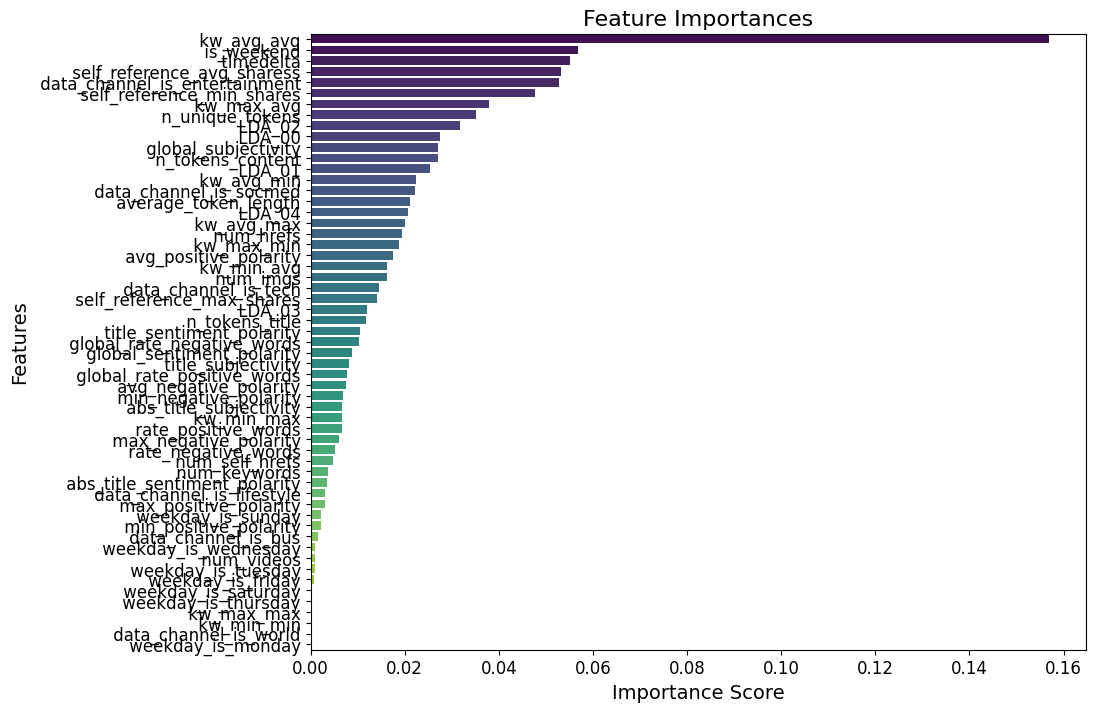

In [ ]:
# Feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


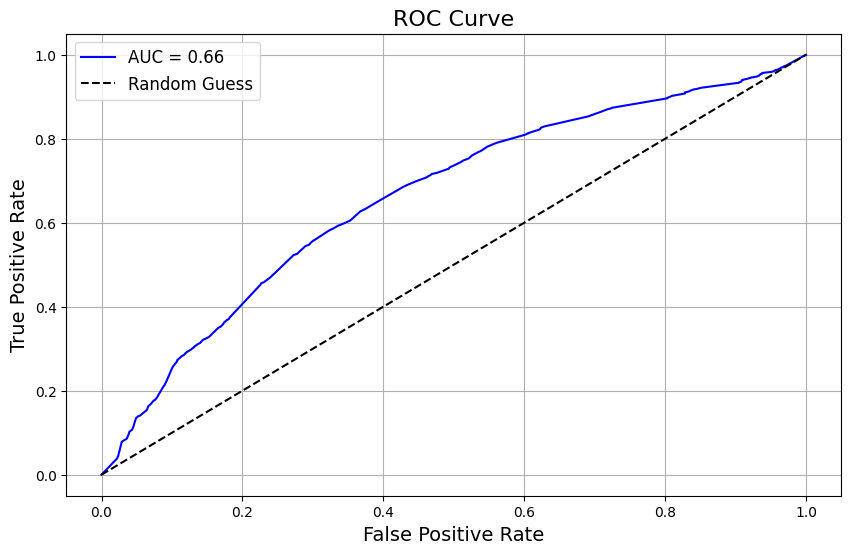

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


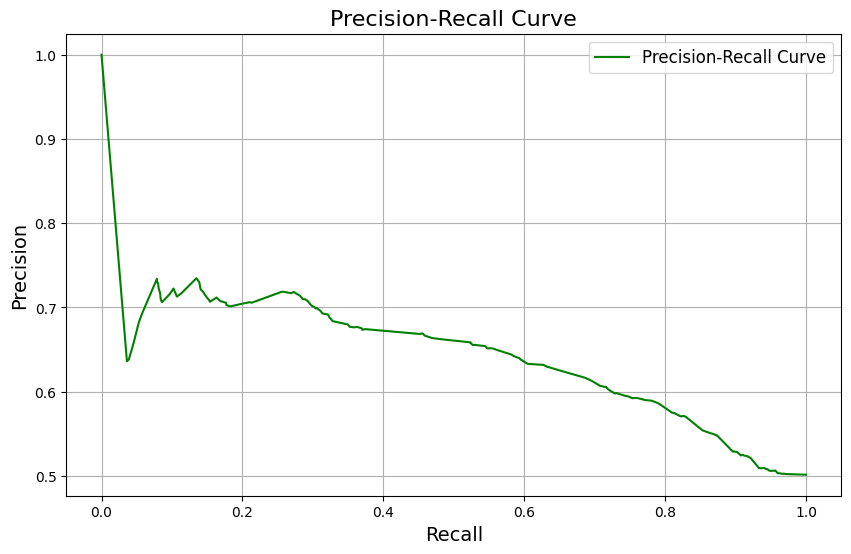

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

#  model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      5927
           1       0.68      0.65      0.66      5960

    accuracy                           0.67     11887
   macro avg       0.67      0.67      0.67     11887
weighted avg       0.67      0.67      0.67     11887



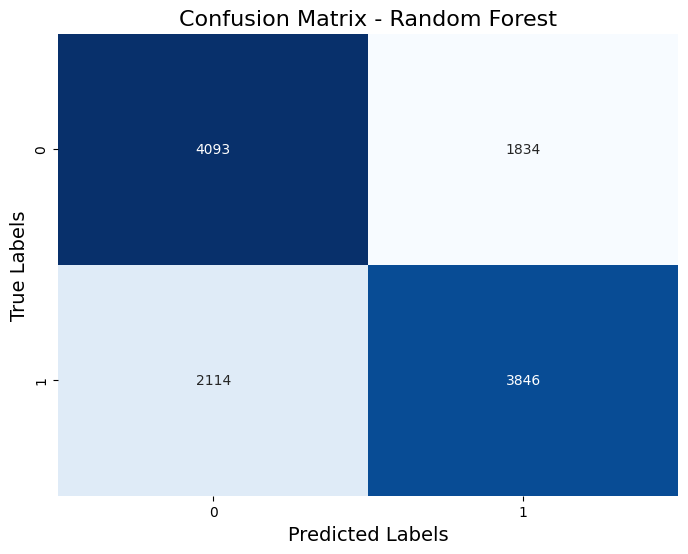

In [ ]:
# confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


<ipython-input-33-c5e9d7a9fb21>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_rf, palette='viridis')


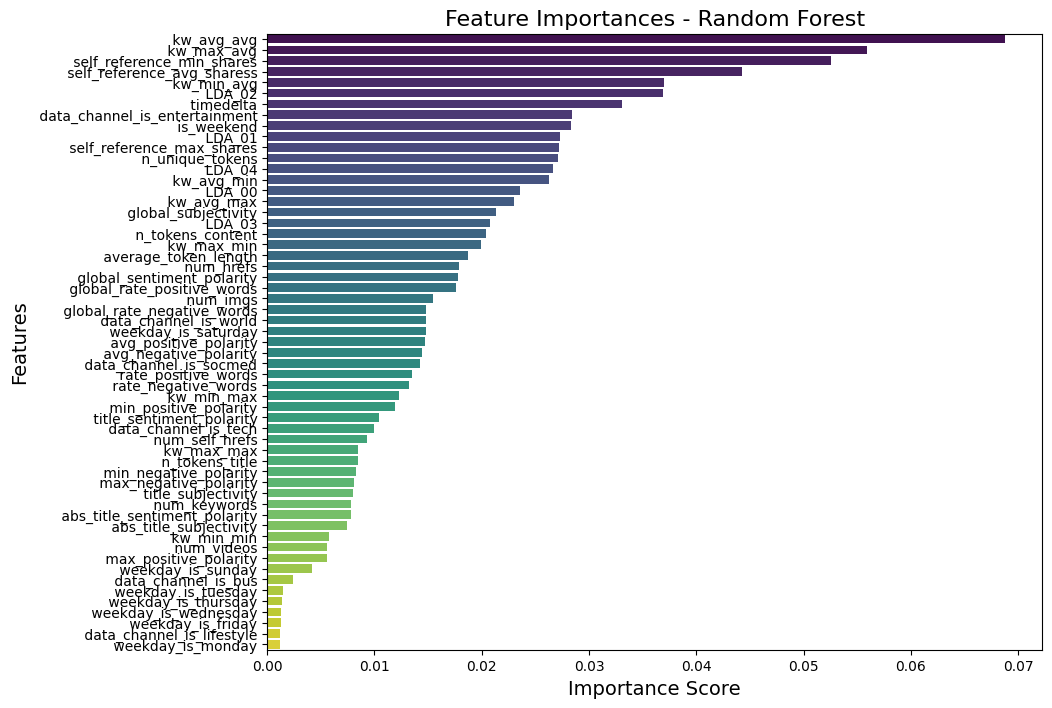

In [ ]:
# Feature importances
feature_importances_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf, palette='viridis')
plt.title('Feature Importances - Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


### tuning parameters for Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.6668709271347476


### Best aprameters after tuning

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


best_rf_model = RandomForestClassifier(
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy of Best Random Forest Model: {accuracy_best_rf:.2f}")


Accuracy of Best Random Forest Model: 0.67


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      5927
           1       0.68      0.65      0.66      5960

    accuracy                           0.67     11887
   macro avg       0.67      0.67      0.67     11887
weighted avg       0.67      0.67      0.67     11887



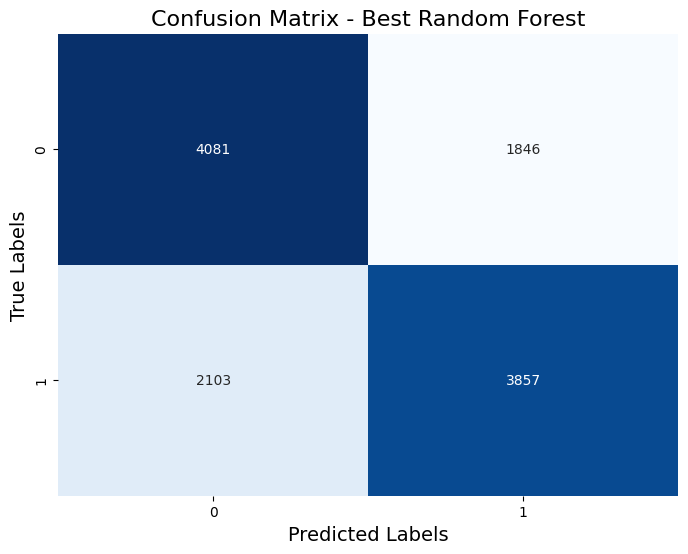

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

#confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best Random Forest', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


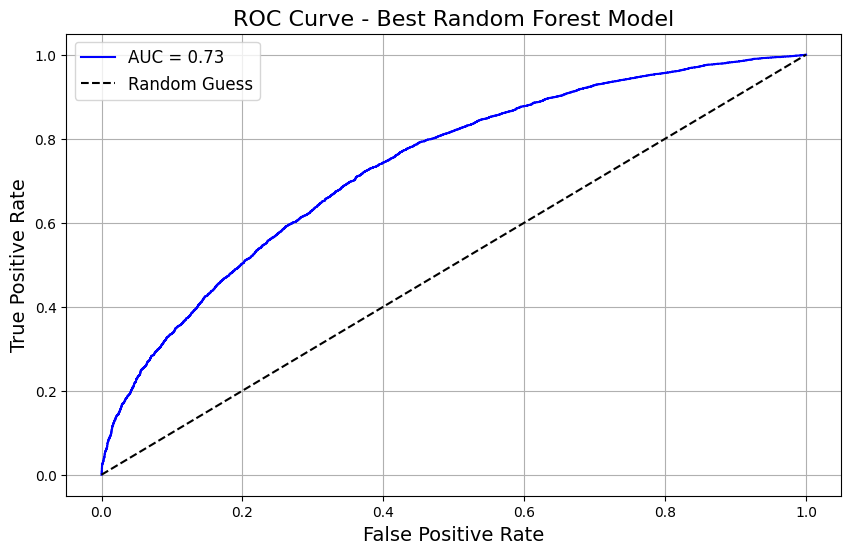

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_best_rf)
auc_score = roc_auc_score(y_test, y_prob_best_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Best Random Forest Model', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Model with Best Parameters
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predict for Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")


Decision Tree Accuracy: 0.63


In [ ]:
from sklearn.metrics import classification_report

# Decision Tree Metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest Metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      5927
           1       0.64      0.58      0.61      5960

    accuracy                           0.63     11887
   macro avg       0.63      0.63      0.63     11887
weighted avg       0.63      0.63      0.63     11887

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      5927
           1       0.68      0.65      0.66      5960

    accuracy                           0.67     11887
   macro avg       0.67      0.67      0.67     11887
weighted avg       0.67      0.67      0.67     11887



## Comparison Between two models

<ipython-input-44-cfb2cbb4af3b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


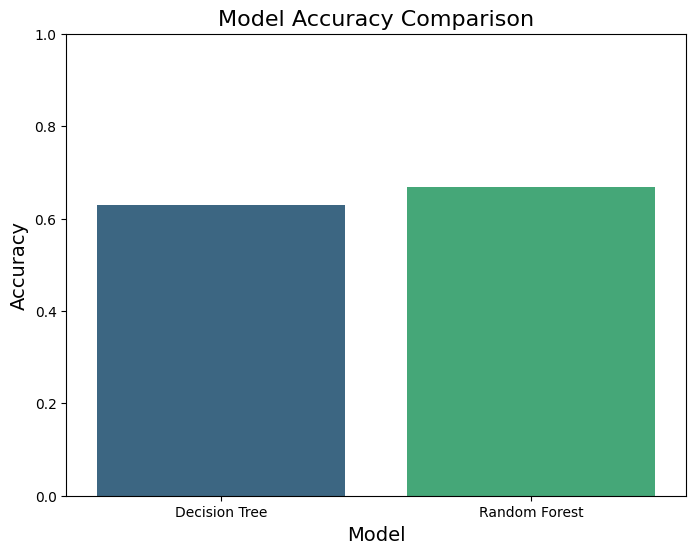

In [ ]:
# Accuracy Scores
model_names = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_dt, accuracy_best_rf]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 1)
plt.show()


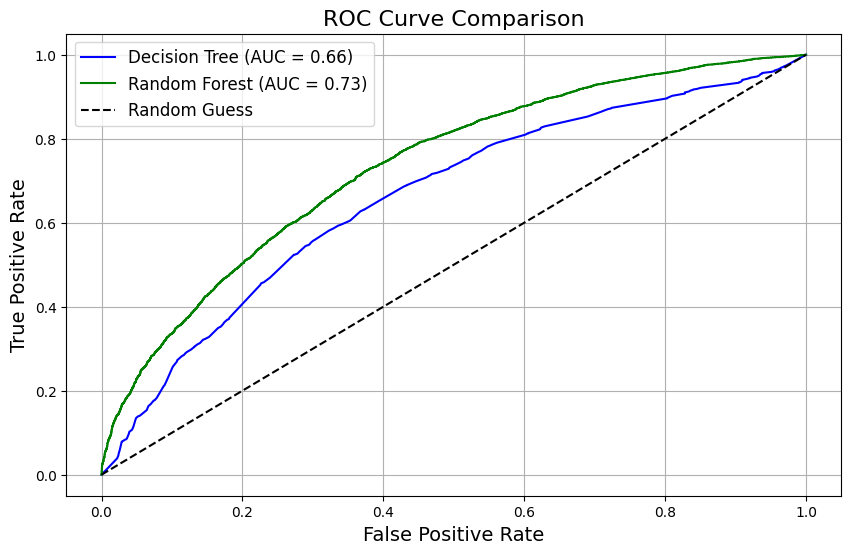

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Decision Tree ROC
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Random Forest ROC
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # 'scale' is default for gamma
svm_model.fit(X_train_scaled, y_train)


SVC(C=1, random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)


In [ ]:
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      5927
           1       0.67      0.61      0.64      5960

    accuracy                           0.66     11887
   macro avg       0.66      0.66      0.66     11887
weighted avg       0.66      0.66      0.66     11887



SVM Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      5927
           1       0.67      0.61      0.64      5960

    accuracy                           0.66     11887
   macro avg       0.66      0.66      0.66     11887
weighted avg       0.66      0.66      0.66     11887



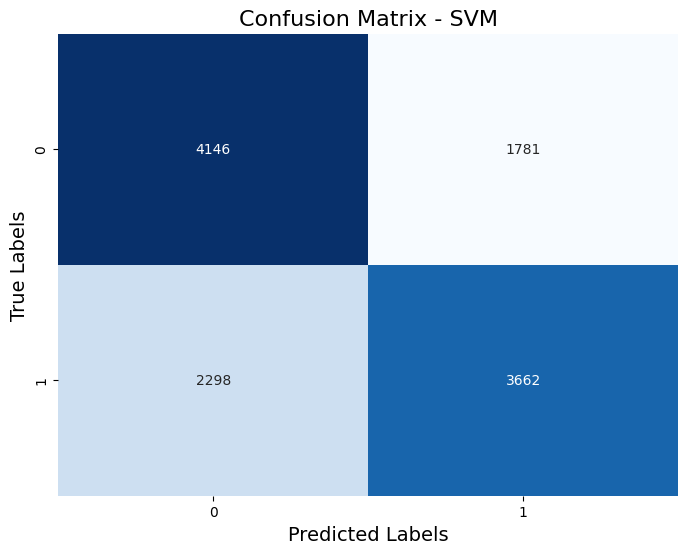

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # 'scale' is default for gamma
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


By comparing the above three models Random forest and SVM worked best compared to Descion tree